In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [57]:
# Cargamos el dataset con manejo de excepciones
ruta = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 4 - Dataset Red Wine Quality\winequality-red.csv"
data = pd.read_csv(ruta)

In [59]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
# Exploración de datos
print(data.shape)

(1599, 12)


In [61]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [63]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


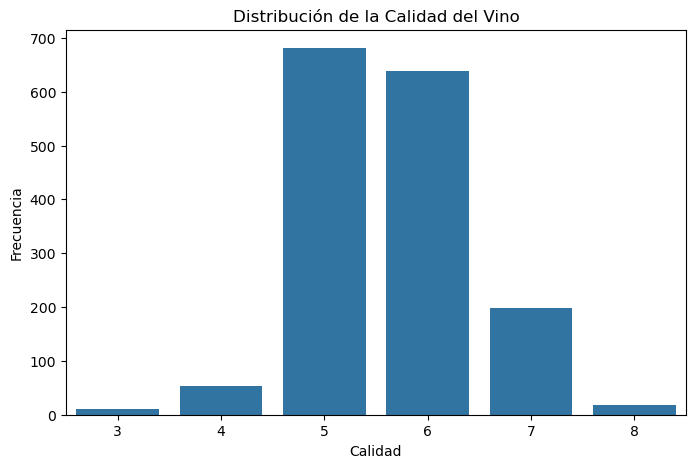

In [65]:
# Visualización de la distribución de la calidad del vino
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1200x800 with 0 Axes>

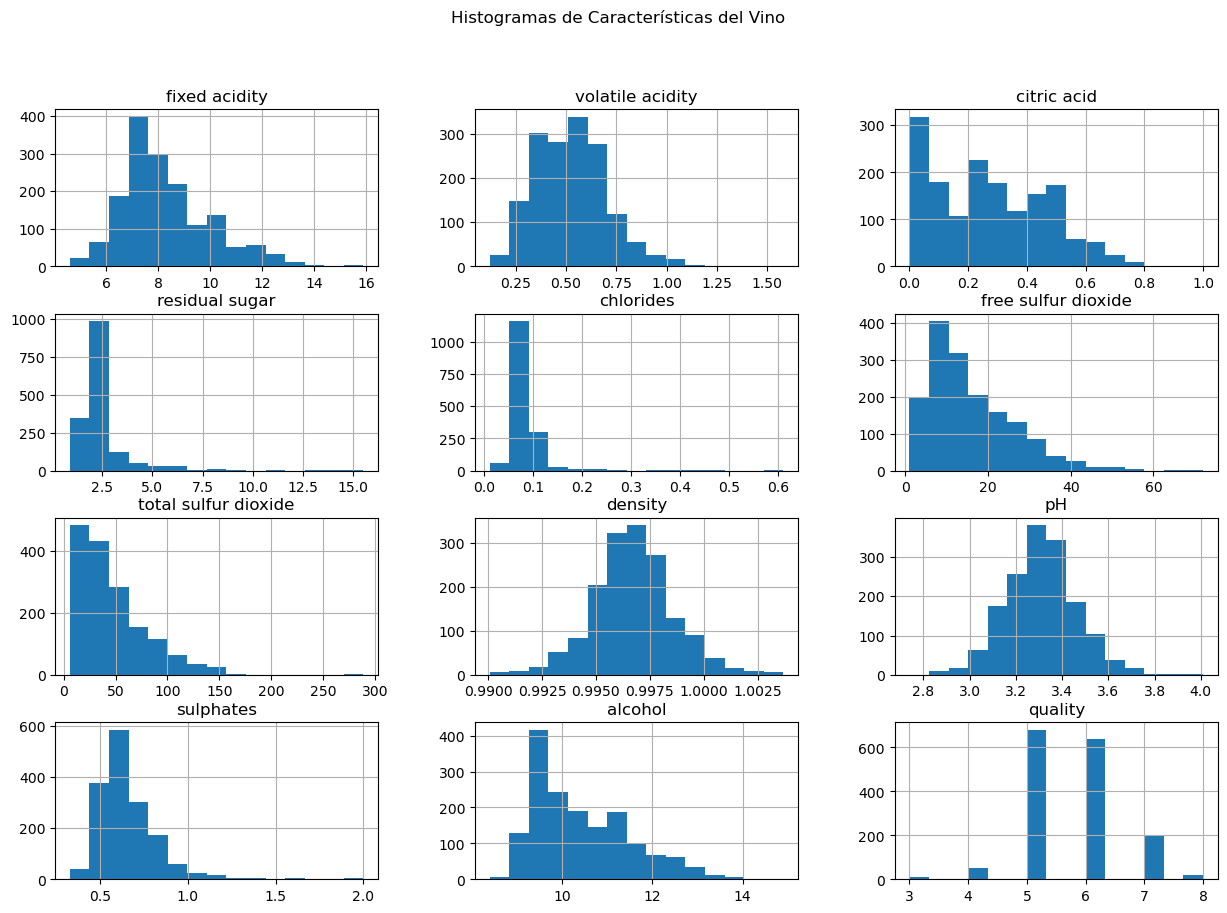

In [67]:
# Histogramas de características
plt.figure(figsize=(12, 8))
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas de Características del Vino')
plt.show()

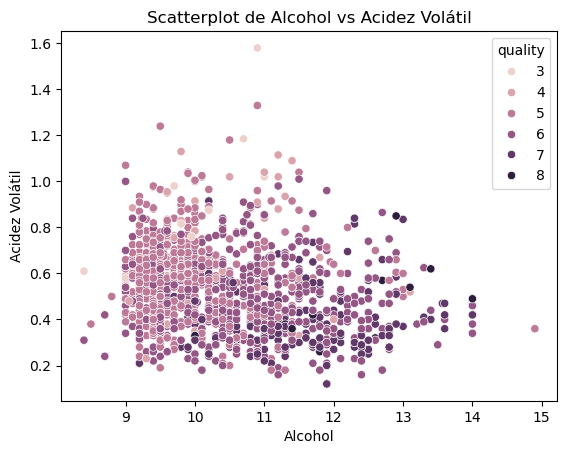

In [69]:
# Scatterplot de Alcohol vs Volatile Acidity
sns.scatterplot(x="alcohol", y="volatile acidity", hue="quality", data=data)
plt.title('Scatterplot de Alcohol vs Acidez Volátil')
plt.xlabel('Alcohol')
plt.ylabel('Acidez Volátil')
plt.show()

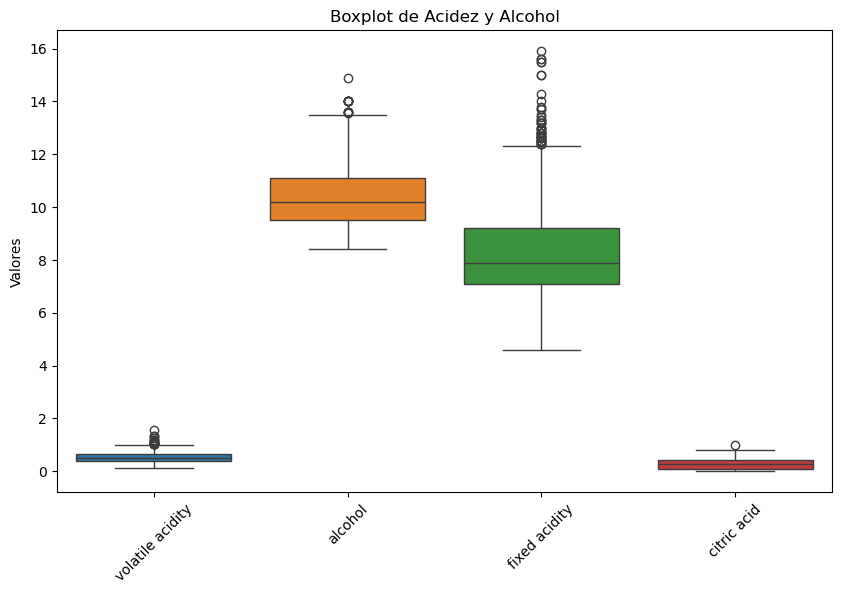

In [71]:
# Boxplot de Acidez y Alcohol
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'alcohol', 'fixed acidity', 'citric acid']])
plt.xticks(rotation=45)
plt.title('Boxplot de Acidez y Alcohol')
plt.ylabel('Valores')
plt.show()

In [73]:
# Selección de predictores y objetivo
predictors_col = ["volatile acidity", "alcohol", "fixed acidity", "citric acid"]
target_col = ['quality']
predictors = data[predictors_col]
target = data[target_col]

In [75]:
# Normalización de los datos
predictors

,volatile acidity,alcohol,fixed acidity,citric acid
0,0.700,9.4,7.4,0.00
1,0.880,9.8,7.8,0.00
2,0.760,9.8,7.8,0.04
3,0.280,9.8,11.2,0.56
4,0.700,9.4,7.4,0.00
...,...,...,...,...
1594,0.600,10.5,6.2,0.08
1595,0.550,11.2,5.9,0.10
1596,0.510,11.0,6.3,0.13
1597,0.645,10.2,5.9,0.12


In [77]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [79]:
corr = predictors.corr()
corr

,volatile acidity,alcohol,fixed acidity,citric acid
volatile acidity,1.000000,-0.202288,-0.256131,-0.552496
alcohol,-0.202288,1.000000,-0.061668,0.109903
fixed acidity,-0.256131,-0.061668,1.000000,0.671703
citric acid,-0.552496,0.109903,0.671703,1.000000


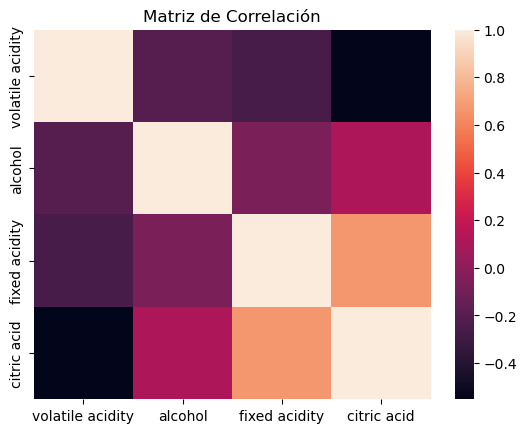

In [81]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [83]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.2, random_state=42)

In [85]:
# Entrenamiento del modelo de árbol de decisión
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)

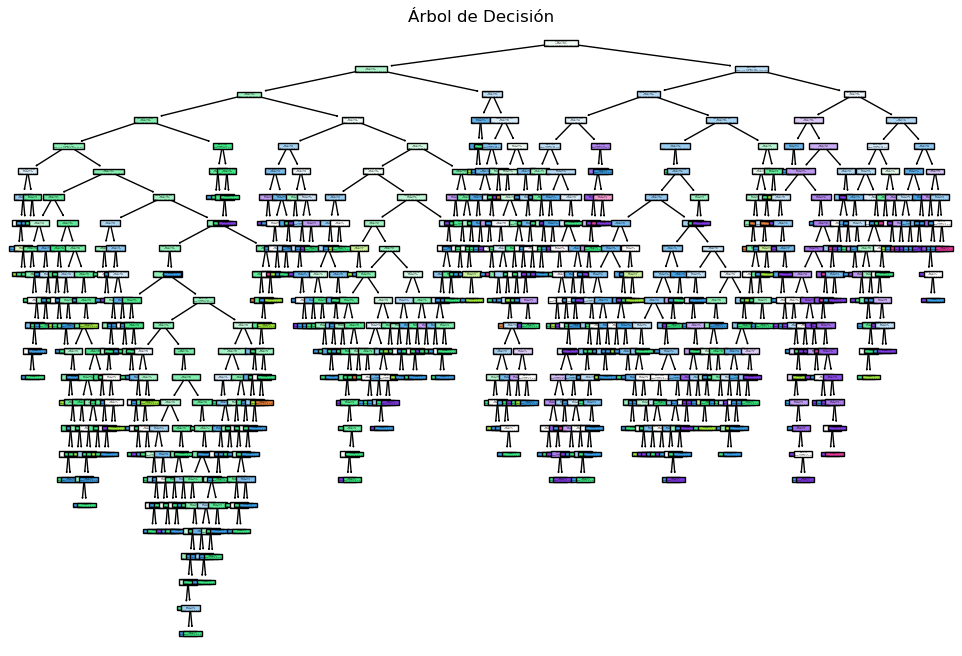

In [87]:
# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(arbol, filled=True, feature_names=predictors_col)
plt.title('Árbol de Decisión')
plt.show()

In [89]:
# Predicciones y evaluación del modelo
predicciones = arbol.predict(X_test)

In [91]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, predicciones)
precision = precision_score(y_test, predicciones, average='weighted')
recall = recall_score(y_test, predicciones, average='weighted')
f1 = f1_score(y_test, predicciones, average='weighted')

print(f"Exactitud: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Exactitud: 0.57
Precisión: 0.59
Recall: 0.57
F1 Score: 0.58


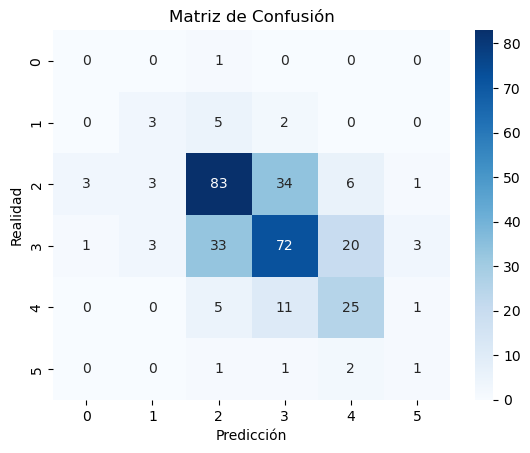

In [93]:
# Matriz de confusión
cm = confusion_matrix(y_test, predicciones)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [95]:
# Reporte de clasificación
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.30      0.32        10
           5       0.65      0.64      0.64       130
           6       0.60      0.55      0.57       132
           7       0.47      0.60      0.53        42
           8       0.17      0.20      0.18         5

    accuracy                           0.57       320
   macro avg       0.37      0.38      0.37       320
weighted avg       0.59      0.57      0.58       320

